 # Gender classification using keras API

In [ ]:
import numpy as np  # Data manipulation
import pandas as pd # Dataframe manipulation 
import matplotlib.pyplot as plt # Plotting the data and the results
import matplotlib.image as mpimg # For displaying imagees
%matplotlib inline

import tensorflow as tf
from tensorflow import keras

from keras import models
from keras import layers
import keras.preprocessing  as kp
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from keras import optimizers
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive', force_remount=True)
GLOBAL_PATH = "/content/gdrive/MyDrive/Lab-Proj/"
MODELS_PATH = f"{GLOBAL_PATH}models/"
LOCAL_PATH = "/content/Dataset/"
PATH_PROJ = GLOBAL_PATH + "archive2.zip"
PATH_TESTING = GLOBAL_PATH + "gender-testing"

Mounted at /content/gdrive


In [ ]:
!unzip -nqq $PATH_TESTING 

In [ ]:
!unzip -o $PATH_PROJ

Streaming output truncated to the last 5000 lines.
  inflating: Dataset/Validation/Male/189674.jpg  
  inflating: Dataset/Validation/Male/189675.jpg  
  inflating: Dataset/Validation/Male/189676.jpg  
  inflating: Dataset/Validation/Male/189679.jpg  
  inflating: Dataset/Validation/Male/189681.jpg  
  inflating: Dataset/Validation/Male/189684.jpg  
  inflating: Dataset/Validation/Male/189688.jpg  
  inflating: Dataset/Validation/Male/189689.jpg  
  inflating: Dataset/Validation/Male/189691.jpg  
  inflating: Dataset/Validation/Male/189692.jpg  
  inflating: Dataset/Validation/Male/189693.jpg  
  inflating: Dataset/Validation/Male/189694.jpg  
  inflating: Dataset/Validation/Male/189695.jpg  
  inflating: Dataset/Validation/Male/189696.jpg  
  inflating: Dataset/Validation/Male/189697.jpg  
  inflating: Dataset/Validation/Male/189698.jpg  
  inflating: Dataset/Validation/Male/189702.jpg  
  inflating: Dataset/Validation/Male/189704.jpg  
  inflating: Dataset/Validation/Male/189705.jpg  

# Data

## Plot Data

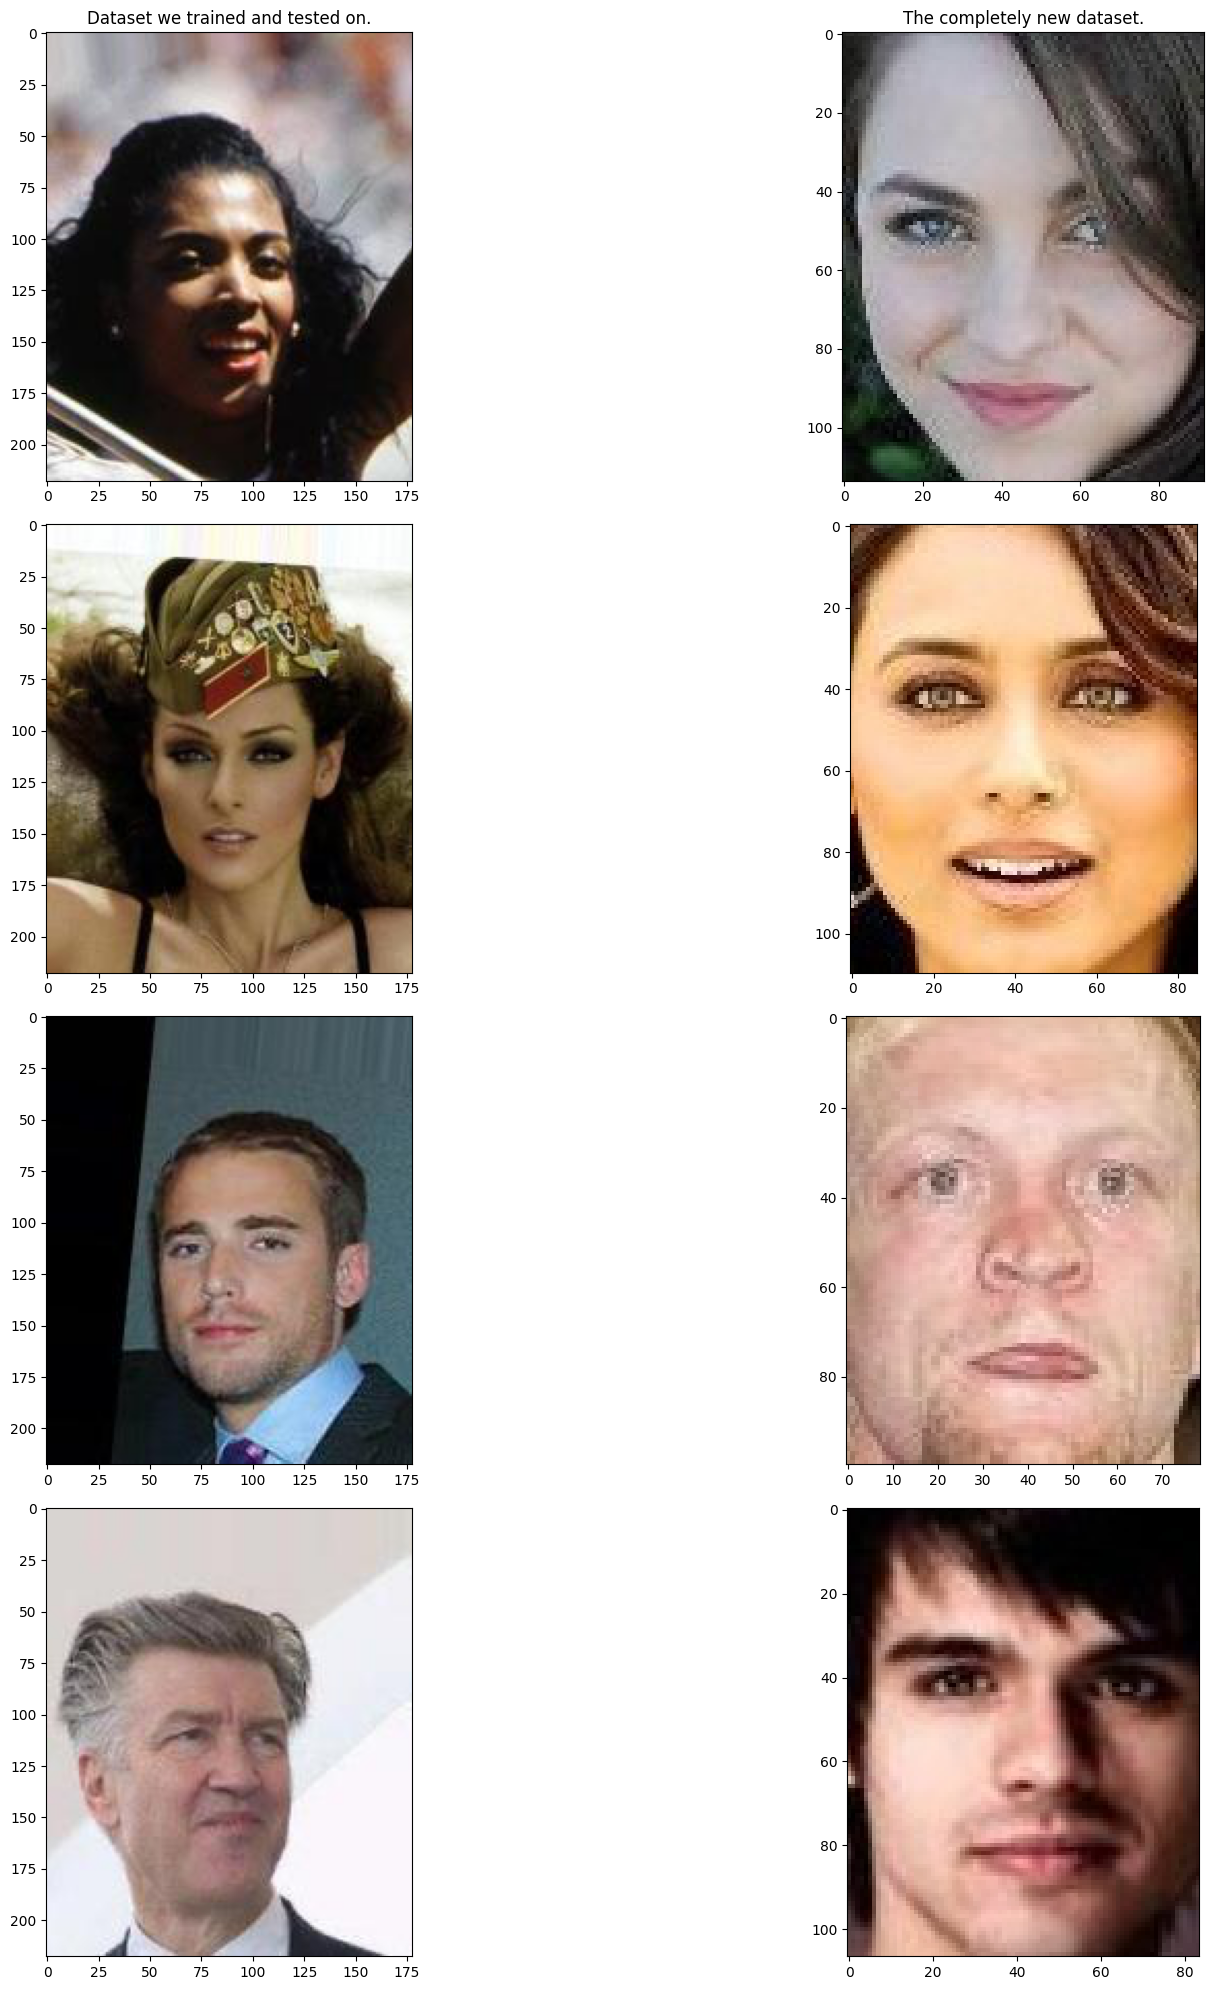

In [ ]:
fig,ax=plt.subplots(ncols=2,nrows=4,figsize=(20,20))
img1 = mpimg.imread('/content//Dataset/Test/Female/160003.jpg')
ax[0][0].imshow(img1)
ax[0][0].set_title("Dataset we trained and tested on.")
img2 = mpimg.imread('/content/Training/female/131422.jpg.jpg')
ax[0][1].imshow(img2)
ax[0][1].set_title("The completely new dataset.")
img3 =  mpimg.imread('/content/Dataset/Validation/Female/180019.jpg')
ax[1][0].imshow(img3)
img4= mpimg.imread('/content/Validation/female/113010.jpg.jpg')
ax[1][1].imshow(img4)
img5 = mpimg.imread('/content/Dataset/Validation/Male/180028.jpg')
ax[2][0].imshow(img5)
img6 = mpimg.imread('/content/Validation/male/063517.jpg.jpg')
ax[2][1].imshow(img6)
ax[3][0].imshow(mpimg.imread('/content/Dataset/Validation/Male/180073.jpg'))
ax[3][1].imshow(mpimg.imread('/content/Validation/male/063531.jpg.jpg'))
plt.tight_layout()

## Splitting

In [ ]:
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""
Variables
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""
BATCH_SIZE = 256
IMG_SIZE = (224, 224)


# train_dataset = tf.keras.utils.image_dataset_from_directory(f'{LOCAL_PATH}Train',
#             shuffle=True,
#             batch_size=BATCH_SIZE,
#             image_size=IMG_SIZE,
#             seed=42)#, validation_split=0.6, subset="training")
# validation_dataset = tf.keras.utils.image_dataset_from_directory(f'{LOCAL_PATH}Validation',
#             shuffle=True,
#             batch_size=BATCH_SIZE,
#             image_size=IMG_SIZE,
#             seed=42)#, validation_split=0.3, subset="training")
    
# class_names = train_dataset.class_names
# print( "class_names: " + str( class_names ) )


# """""""""""""""""""""""""""""""""""""""""""""""""""""""""
# DataSet
# """""""""""""""""""""""""""""""""""""""""""""""""""""""""
# AUTOTUNE = tf.data.experimental.AUTOTUNE
# train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)



In [ ]:
traindata_generator=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,zoom_range=0.2,width_shift_range=0.2,height_shift_range=0.2,
                                                                    shear_range=0.2, horizontal_flip=True,validation_split=0.7,fill_mode='nearest', 
                                                                    preprocessing_function = tf.keras.applications.efficientnet_v2.preprocess_input)#tf.keras.applications.inception_v3.preprocess_input)

validdata_generator=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=0.6, preprocessing_function =tf.keras.applications.efficientnet_v2.preprocess_input)#tf.keras.applications.inception_v3.preprocess_input)
testdata_generator=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, preprocessing_function = tf.keras.applications.efficientnet_v2.preprocess_input)#tf.keras.applications.inception_v3.preprocess_input)

train_dataset=traindata_generator.flow_from_directory(f"{LOCAL_PATH}Train", batch_size=BATCH_SIZE,
                                                             class_mode="categorical",
                                                             target_size=IMG_SIZE,
                                                             color_mode="rgb",
                                                             shuffle=True,subset="training" )

validation_dataset=validdata_generator.flow_from_directory(f"{LOCAL_PATH}Validation", batch_size=BATCH_SIZE,class_mode="categorical",
                                                             target_size=IMG_SIZE,color_mode="rgb",shuffle=True,subset="training"  )

test_dataset=testdata_generator.flow_from_directory(f"{LOCAL_PATH}Test", batch_size=BATCH_SIZE,class_mode="categorical",
                                                           target_size=IMG_SIZE,color_mode="rgb",shuffle=False )

Found 48001 images belonging to 2 classes.
Found 9040 images belonging to 2 classes.
Found 20001 images belonging to 2 classes.


# Model
Transfer Learning and Fine Tuning

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Dropout

In [ ]:
# %%script false --no-raise-error

n_classes=2
input_shape = IMG_SIZE + (3,)

In [ ]:
# %%script false --no-raise-error

data_augmentation = tf.keras.Sequential([ tf.keras.layers.RandomFlip(mode="horizontal", seed=42), tf.keras.layers.RandomRotation(factor=0.05, seed=42), tf.keras.layers.RandomContrast(factor=0.2, seed=42) ])# tf.keras.Sequential([ tf.keras.layers.RandomFlip('horizontal'), tf.keras.layers.RandomRotation(0.2), ])

## Freeze layers

In [ ]:
# %%script false --no-raise-error

# base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(input_shape=input_shape, weights="imagenet",include_top=False)

base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2S(input_shape=input_shape, weights="imagenet",include_top=False)


# freezing
for layer in base_model.layers:
  layer.trainable = False


# input
# inputs = tf.keras.Input(shape=input_shape)

# data augmentation
# x = data_augmentation(inputs)

#preprocess
# x = tf.keras.applications.efficientnet_v2.preprocess_input(inputs)

x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(.2)(x)
x = Flatten()(x)

# # x = tf.keras.layers.BatchNormalization()(x)
# x = tf.keras.layers.Dense(128, activation="relu", kernel_initializer="he_normal")(x)
# # x = tf.keras.layers.BatchNormalization()(x)
# x = tf.keras.layers.Dropout(.2)(x)


# x = tf.keras.layers.Dense(64, activation="relu", kernel_initializer="he_normal")(x)
# # x = tf.keras.layers.BatchNormalization()(x)
# x = tf.keras.layers.Dropout(.2)(x)


# x = tf.keras.layers.Dense(32, activation="relu", kernel_initializer="he_normal")(x)
# # x = tf.keras.layers.BatchNormalization()(x)
# x = tf.keras.layers.Dropout(.2)(x)


# x = tf.keras.layers.Dense(16, activation="relu", kernel_initializer="he_normal")(x)
# # x = tf.keras.layers.BatchNormalization()(x)
# x = tf.keras.layers.Dropout(.2)(x)

# output
prediction_layer = tf.keras.layers.Dense(units = n_classes, activation='sigmoid')
output = prediction_layer(x) 


model = tf.keras.Model(inputs=base_model.input, outputs=output)
model.summary()

# tf.keras.utils.plot_model(model, to_file="/content/img_model.png", show_shapes=True) # plot


82420632/82420632 [==============================] - 5s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 stem_conv (Conv2D)             (None, 112, 112, 24  648         ['rescaling[0][0]']              
                                )                                                                 
                             

In [ ]:
# BATCH_SIZE = 1024

MODEL_PATH=f"{MODELS_PATH}EfficientNetV2S-gender.h5"
checkpoint_filepath = MODEL_PATH
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='accuracy',
    mode='max',
    save_best_only=True)

es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [ ]:

# %%script false --no-raise-error
model=keras.models.load_model(MODEL_PATH)

# optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, clipvalue=1.0)

# model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

# history = model.fit(train_dataset, 
#                   verbose=1, 
#                   validation_data=validation_dataset,
#                   epochs=3,
#                   batch_size=BATCH_SIZE, callbacks = [model_checkpoint_callback, es])

In [ ]:
for layer in base_model.layers[-100:]:
  layer.trainable = True


optimizer = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9, clipvalue=1.0)

model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

history = model.fit(train_dataset, 
                  verbose=1, 
                  validation_data=validation_dataset,
                  epochs=10,
                  batch_size=BATCH_SIZE, callbacks = [model_checkpoint_callback, es])

Epoch 1/10
188/188 [==============================] - 733s 4s/step - loss: 0.4864 - accuracy: 0.7590 - val_loss: 0.4094 - val_accuracy: 0.8091
Epoch 2/10
188/188 [==============================] - 689s 4s/step - loss: 0.4687 - accuracy: 0.7695 - val_loss: 0.3834 - val_accuracy: 0.8220
Epoch 3/10
188/188 [==============================] - 690s 4s/step - loss: 0.4571 - accuracy: 0.7782 - val_loss: 0.3770 - val_accuracy: 0.8277
Epoch 4/10
188/188 [==============================] - 691s 4s/step - loss: 0.4488 - accuracy: 0.7819 - val_loss: 0.3642 - val_accuracy: 0.8304
Epoch 5/10
188/188 [==============================] - 698s 4s/step - loss: 0.4355 - accuracy: 0.7875 - val_loss: 0.3637 - val_accuracy: 0.8324
Epoch 6/10
188/188 [==============================] - 697s 4s/step - loss: 0.4289 - accuracy: 0.7937 - val_loss: 0.3648 - val_accuracy: 0.8351
Epoch 7/10
188/188 [==============================] - 685s 4s/step - loss: 0.4230 - accuracy: 0.7955 - val_loss: 0.3579 - val_accuracy: 0.8376

## Testing

In [ ]:
model=keras.models.load_model(MODEL_PATH)

In [ ]:


test_dataset2 = tf.keras.utils.image_dataset_from_directory('/content/Validation',
            shuffle=True,
            batch_size=BATCH_SIZE,
            image_size=IMG_SIZE,
            seed=42)

test_dataset3 = tf.keras.utils.image_dataset_from_directory('/content/Training',
            shuffle=True,
            batch_size=BATCH_SIZE,
            image_size=IMG_SIZE,
            seed=42)


Found 11649 files belonging to 2 classes.
Found 47009 files belonging to 2 classes.


In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)
print('test acc:', test_acc)
print('test_loss:',test_loss)

79/79 [==============================] - 73s 873ms/step - loss: 0.3159 - accuracy: 0.8618
test acc: 0.8617569208145142
test_loss: 0.3159138858318329


In [ ]:
test_loss, test_acc = model.evaluate(test_dataset2)
print('test acc:', test_acc)
print('test_loss:',test_loss)

ValueError: ignored

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset3)
print('test acc:', test_acc)
print('test_loss:',test_loss)

In [ ]:
y = np.concatenate([y for x, y in test_dataset], axis=0)
y